# Exploratory Data Analysis

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

from data_loader import load_data

train_data = load_data("train.csv")
test_data = load_data("test.csv")

In [ ]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (40000, 2)
Test Data Shape: (10000, 2)


In [ ]:
display(train_data.head())

,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


In [ ]:
print("\nMissing Values:\n", train_data.isnull().sum())


Missing Values:
 review       0
sentiment    0
dtype: int64


C:\Users\Serhet\AppData\Local\Temp\ipykernel_22428\1682090284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data["sentiment"], palette="coolwarm")


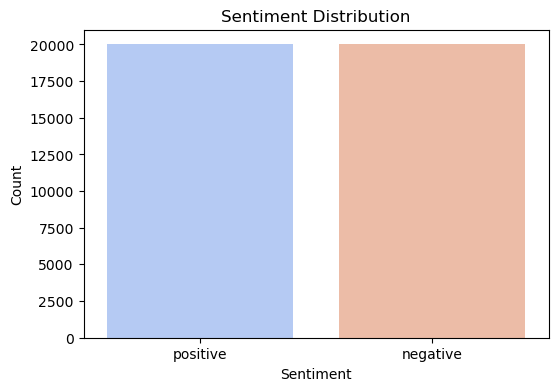

In [ ]:
figures_dir = os.path.join(os.getcwd(), "..", "outputs", "figures")
os.makedirs(figures_dir, exist_ok=True)

plt.figure(figsize=(6,4))
sns.countplot(x=train_data["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.savefig(os.path.join(figures_dir, "sentiment_distribution.png"))
plt.show()

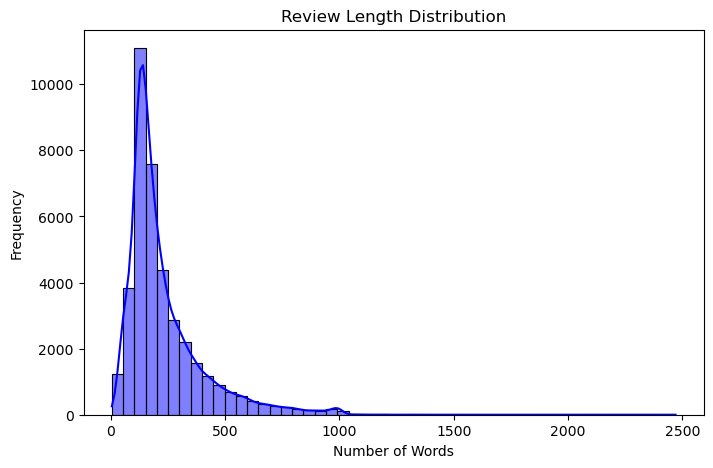

In [ ]:
review_lengths = train_data["review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(review_lengths, bins=50, kde=True, color="blue")
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

plt.savefig(os.path.join(figures_dir, "review_length_distribution.png"))
plt.show()

## Conclusion of EDA
From the exploratory data analysis, we observed the following key points:
1. **Sentiment Distribution**: The dataset is balanced, with an approximately equal number of positive and negative reviews. This ensures that the classification model will not be biased toward one class.<br><br>
2. **Missing Values**: No missing values were detected in the dataset. This means no additional preprocessing is required to handle null values.<br><br>
3. **Review Length Distribution**: The majority of the reviews contain between 0 and 500 words. A small number of reviews are significantly longer, with some exceeding 2,500 words, which might be considered outliers. These could potentially be handled during text preprocessing to avoid skewing the results.

# Text Preprocessing

## Tokenization and Stop-Word Filtering Operations

First, I will perform tokenization and stop-word filtering operations. I am going to use SpaCy instead of NLTK.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

sample_review = "This is an example review to check tokenization and stop-word removal."

doc = nlp(sample_review)

filtered_tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]

print(f"Original Text: {sample_review}")
print(f"Filtered Tokens: {filtered_tokens}")

Original Text: This is an example review to check tokenization and stop-word removal.
Filtered Tokens: ['example', 'review', 'check', 'tokenization', 'stop', 'word', 'removal']


In [ ]:
nlp = spacy.load("en_core_web_sm")

sample_review = "This is an example review to check tokenization and lemmatization versus stemming."

doc = nlp(sample_review)

lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(token.text) for token in doc if not token.is_stop and token.is_alpha]

print(f"Original Text: {sample_review}")
print(f"Lemmatized Tokens: {lemmatized_tokens}")
print(f"Stemmed Tokens: {stemmed_tokens}")

Original Text: This is an example review to check tokenization and lemmatization versus stemming.
Lemmatized Tokens: ['example', 'review', 'check', 'tokenization', 'lemmatization', 'versus', 'stem']
Stemmed Tokens: ['exampl', 'review', 'check', 'token', 'lemmat', 'versu', 'stem']


* Lemmatization preserves the meaning of words, giving a more reliable result.
* Stemming is fast but can be used in non-precision applications.<br>

Therefore, It would be more appropriate to use the Lemmatization method in this project in order not to lose the meaning of the comments.


## Text Vectorization: Bag-of-Words and TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sample_reviews = [
    "This is the first example review.",
    "This review is an example of tokenization.",
    "Tokenization and vectorization are essential for NLP.",
    "TF-IDF and Bag-of-Words are common vectorization techniques."
]

bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(sample_reviews)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(sample_reviews)

print("Bag-of-Words Feature Names:", bow_vectorizer.get_feature_names_out())
print("Bag-of-Words Vectors:\n", bow_vectors.toarray())

print("\nTF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Vectors:\n", tfidf_vectors.toarray())

Bag-of-Words Feature Names: ['an' 'and' 'are' 'bag' 'common' 'essential' 'example' 'first' 'for' 'idf'
 'is' 'nlp' 'of' 'review' 'techniques' 'tf' 'the' 'this' 'tokenization'
 'vectorization' 'words']
Bag-of-Words Vectors:
 [[0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0]
 [0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0]
 [0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1]]

TF-IDF Feature Names: ['an' 'and' 'are' 'bag' 'common' 'essential' 'example' 'first' 'for' 'idf'
 'is' 'nlp' 'of' 'review' 'techniques' 'tf' 'the' 'this' 'tokenization'
 'vectorization' 'words']
TF-IDF Vectors:
 [[0.         0.         0.         0.         0.         0.
  0.37222485 0.47212003 0.         0.         0.37222485 0.
  0.         0.37222485 0.         0.         0.47212003 0.37222485
  0.         0.         0.        ]
 [0.45982207 0.         0.         0.         0.         0.
  0.362529   0.         0.         0.         0.362529   0.
  0.362529   0.362529   0.         0. 

* Bag-of-Words are often appropriate for small projects or applications that focus on word frequency.
* TF-IDF is preferred when we want to do more meaningful text analysis because it captures context better.<br>

In this project, context is important in analyzing comment. Therefore the TF-IDF method would be more appropriate.


## Conclusion of Text Preprocessing

In the text preprocessing phase, we successfully transformed raw textual data into a format suitable for machine learning models. Below are the key steps and insights from this process:

1. **Tokenization and Stop-Word Filtering**:

* We used SpaCy to tokenize the text and remove stop-words effectively. This helped in reducing noise by eliminating common but non-informative words like "is" or "the."

2. **Lemmatization vs. Stemming**:

* Lemmatization was chosen over stemming as it retains the contextual meaning of words by reducing them to their base forms. This ensures that words like "running" and "ran" are treated as "run," while preserving their semantic meaning.

3. **Text Vectorization**:

* Two vectorization techniques were explored: Bag-of-Words (BoW) and TF-IDF.
While BoW is simpler and counts word frequencies, TF-IDF was selected for its ability to highlight important words by considering their frequency across documents. This makes TF-IDF more effective for our sentiment classification task.